In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#Scikit-learn

##Machine learning library

http://scikit-learn.org/stable/documentation.html

Great tutorial:
https://github.com/jakevdp/sklearn_pycon2015 

(This tutorial has motivated some aspects of this tutorial and some code examples are similar)

"Machine learning is a subfield of computer science that evolved from the study of pattern recognition and computational learning theory in artificial intelligence. Machine learning explores the construction and study of algorithms that can learn from and make predictions on data. Such algorithms operate by building a model from example inputs in order to make data-driven predictions or decisions, rather than following strictly static program instructions." (Wikipedia)

##Basic structure:

### Supervised learning

You want to infer a function based on labeled training data. Each input consists of features and an output variable.

### Unsupervised learning

You want to find a hidden structure in unlabeled data. 

##Data representation

###Mostly 2-dimensional array represented by Numpy/Scipy

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [5]:
from IPython.display import Image, display
a = Image(url='http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg', width=400, height=400)
display(a)
print("Iris Setosa\n")

a = Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/1920px-Iris_versicolor_3.jpg', width=400, height=400)
display(a)
print("Iris Versicolor\n")

a = Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1920px-Iris_virginica.jpg', width=400, height=400)
display(a)
print("Iris Virginica")

Iris Setosa



Iris Versicolor



Iris Virginica


In [6]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

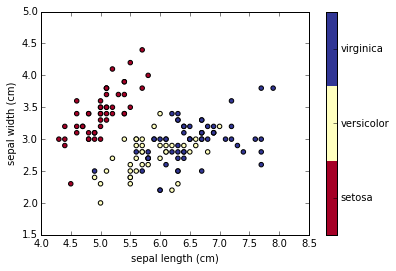

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

#Basics of scikit learn

##API

In scikit learn, you usually work with so-called estimator objects that have a similar API to work with.

In [5]:
from sklearn.svm import SVC

In [14]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementations is a based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each,
 |  see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  .. The narrative documentation is available at http://scikit-learn.org/
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'li

- fit = train an algorithm
- predict = predict the value for a given record
- predict_proba = predict the probability of all possible classes for a given record (classification only)
- transform = alter your data based on a given preprocessor (i.e. normalize or scale your data) (preprocessing/unsuperivsed)
- fit_transform = train a preprocessor and then transform the data in a single step (preprocessing/unsuperivsed)

##SVC example (Supervised learning)

In [3]:
X = iris.data
y = iris.target

In [6]:
clf = SVC()

In [7]:
clf.intercept_

AttributeError: 'SVC' object has no attribute 'intercept_'

In [8]:
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
clf.intercept_

array([-0.03985691, -0.16777453, -0.14370469])

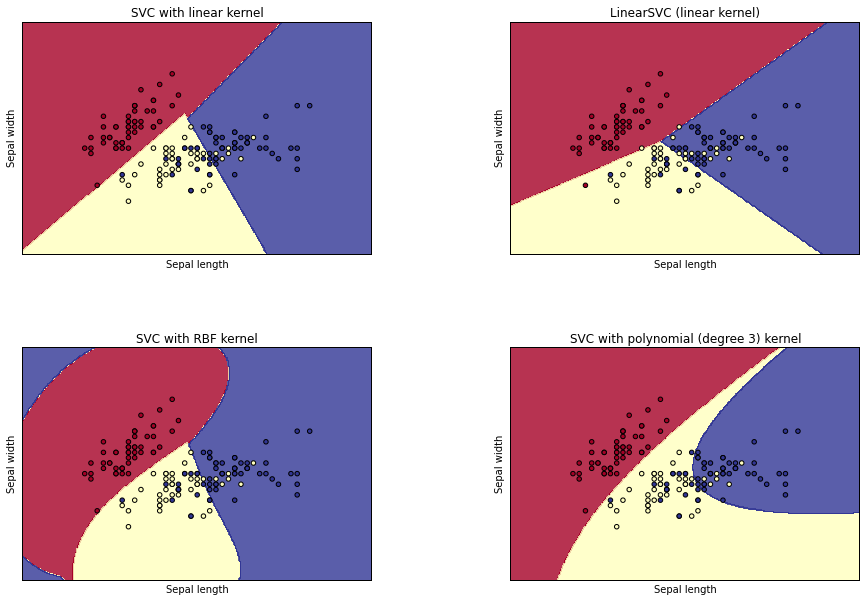

In [51]:
#http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(15,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2,2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.get_cmap('RdYlBu', 3), alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('RdYlBu', 3))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

##Evaluation

In [57]:
X = iris.data[:, :2]
y = iris.target
clf = SVC(kernel='linear', C=1)
clf.fit(X,y)
y_pred = clf.predict(X)
print("{0} / {1} correct".format(np.sum(y == y_pred), len(y)))

123 / 150 correct


Problem: We have evaluated our classifier on the same data on which we have trained it. By doing so, we will potentially heavily over-fit the data. Thus, we need better ways of evaluating a classifier: splitting the data in training and test data set.

In [66]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [68]:
clf = SVC(kernel='linear', C=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

34 / 38 correct


This metric is called the accuracy score which can be determined more easily via the scikit learn library.

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.89473684210526316

In [73]:
clf.score(X_test,y_test)

0.89473684210526316

###Cross-Validation

With a simple train/test split we randomly split the data at one point as lose some data for both training and testing. We could also split the data in two folds and repeat the process.

In [74]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=0)
X1.shape, X2.shape

((75, 4), (75, 4))

In [75]:
print(SVC().fit(X2, y2).score(X1, y1))
print(SVC().fit(X1, y1).score(X2, y2))

0.973333333333
0.933333333333


In [81]:
from sklearn.cross_validation import cross_val_score
cv = cross_val_score(SVC(), X, y, cv=2)
print cv
cv.mean()

[ 0.90666667  0.96      ]


0.93333333333333335

Or we can extend this to multiple k-folds!

In [105]:
from sklearn.cross_validation import cross_val_score, KFold
cv = cross_val_score(SVC(), X, y, cv=10)
print cv
cv.mean()

[ 1.          1.          0.86666667  1.          0.93333333  1.          1.
  1.          1.          1.        ]


0.98000000000000009

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.cross_validation import cross_val_score

# import some data to play with
iris = datasets.load_iris()
X = iris.data  
y = iris.target

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    cv = cross_val_score(clf, X, y, cv=KFold(len(X),10, random_state=42))
    print titles[i], cv.mean()

    

SVC with linear kernel 0.96
LinearSVC (linear kernel) 0.926666666667
SVC with RBF kernel 0.946666666667
SVC with polynomial (degree 3) kernel 0.953333333333


##Clustering with K-means (Unsupervised Learning)

No information about the labels!

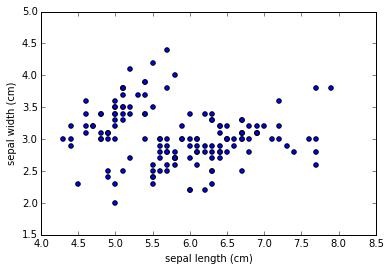

In [117]:
x_index = 0
y_index = 1
plt.scatter(iris.data[:, 0], iris.data[:, 1])
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

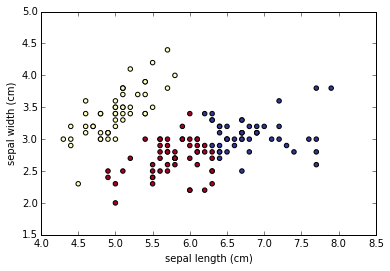

In [123]:
from sklearn.cluster import KMeans

X = iris.data[:,:2]
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,
           cmap='RdYlBu');
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

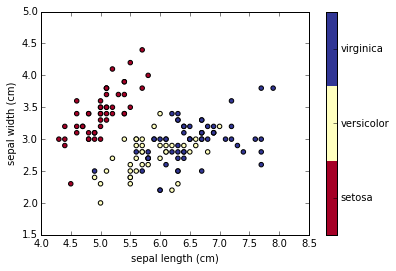

In [119]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

##Dimensionality Reduction with PCA

('Reduced dataset shape:', (150, 2))
Meaning of the 2 components:
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
-0.657 x sepal length (cm) + -0.730 x sepal width (cm) + 0.176 x petal length (cm) + 0.075 x petal width (cm)


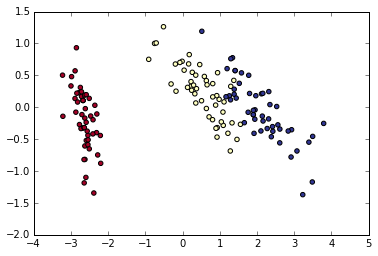

In [126]:
from sklearn.decomposition import PCA

X = iris.data
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

##Feature extraction

Sometimes features are not directly given and one needs to extract them. For example, suppose that we are working with textual data.

In [139]:
from sklearn.feature_extraction.text import CountVectorizer
help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(sklearn.base.BaseEstimator, VectorizerMixin)
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.coo_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Parameters
 |  ----------
 |  input : string {'filename', 'file', 'content'}
 |      If filename, the sequence passed as an argument to fit is
 |      expected to be a list of filenames that need reading to fetch
 |      the raw content to analyze.
 |  
 |      If 'file', the sequence items must have 'read' method (file-like
 |      object) it is called to fetch the bytes in memory.
 |  
 |      Otherwise the input is expected to be the

In [144]:
#http://scikit-learn.org/0.15/modules/feature_extraction.html#feature-extraction

corpus = [
'This is the first document.',
'This is the second second document.',
'And the third one.',
'Is this the first document?',
]

vec = CountVectorizer()
X = vec.fit_transform(corpus)

In [145]:
print X

  (2, 0)	1
  (0, 1)	1
  (1, 1)	1
  (3, 1)	1
  (0, 2)	1
  (3, 2)	1
  (0, 3)	1
  (1, 3)	1
  (3, 3)	1
  (2, 4)	1
  (1, 5)	2
  (0, 6)	1
  (1, 6)	1
  (2, 6)	1
  (3, 6)	1
  (2, 7)	1
  (0, 8)	1
  (1, 8)	1
  (3, 8)	1


In [146]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [147]:
vec.vocabulary_

{u'and': 0,
 u'document': 1,
 u'first': 2,
 u'is': 3,
 u'one': 4,
 u'second': 5,
 u'the': 6,
 u'third': 7,
 u'this': 8}

In [148]:
vec.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [149]:
vec.transform(['Another document']).toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0]])

##Full Example

###Text classification
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [1]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [2]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [4]:
len(twenty_train.data)

2257

In [6]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton


In [7]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [8]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

###Feature extraction

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()

In [11]:
X_train = vec.fit_transform(twenty_train.data)

In [12]:
y_train = twenty_train.target

In [20]:
assert(X_train.shape[0]==len(y_train))

In [24]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(X_train, y_train)

In [25]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_test = vec.transform(docs_new)

In [26]:
predicted = clf.predict(X_test)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [30]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
X_test = vec.transform(twenty_test.data)
y_test = twenty_test.target

In [31]:
clf.score(X_test, y_test)

0.92077230359520634

In [32]:
from sklearn import metrics
print(metrics.classification_report(y_test, clf.predict(X_test),
target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.96      0.83      0.89       319
         comp.graphics       0.90      0.96      0.93       389
               sci.med       0.94      0.91      0.93       396
soc.religion.christian       0.89      0.96      0.93       398

           avg / total       0.92      0.92      0.92      1502



###Pipeline

In [33]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('vect', TfidfVectorizer()),
                      ('clf', SVC(kernel='linear')),
 ])

In [35]:
clf.fit(twenty_train.data, twenty_train.target)

Pipeline(steps=[('vect', TfidfVectorizer(analyzer=u'word', binary=False, charset=None,
        charset_error=None, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

###Grid search

In [40]:
from sklearn.grid_search import GridSearchCV
from pprint import pprint
from time import time

pipeline = Pipeline([('vect', TfidfVectorizer()),
               ('clf', SVC()),
 ])

parameters = {'vect__max_df' : (0.5, 0.75, 1.0),'clf__kernel':('linear', 'rbf'), 'clf__C':[1, 10]}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(twenty_train.data, twenty_train.target)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
('pipeline:', ['vect', 'clf'])
parameters:
{'clf__C': [1, 10],
 'clf__kernel': ('linear', 'rbf'),
 'vect__max_df': (0.5, 0.75, 1.0)}
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done  30 out of  36 | elapsed:  2.5min remaining:   29.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.7min finished


done in 171.036s
()
Best score: 0.971
Best parameters set:
	clf__C: 10
	clf__kernel: 'linear'
	vect__max_df: 0.5
